# Esercitazione 1

In [39]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2
from scipy.stats import cauchy
from scipy.stats import norm

## Test del Generatore di Numeri Casuali

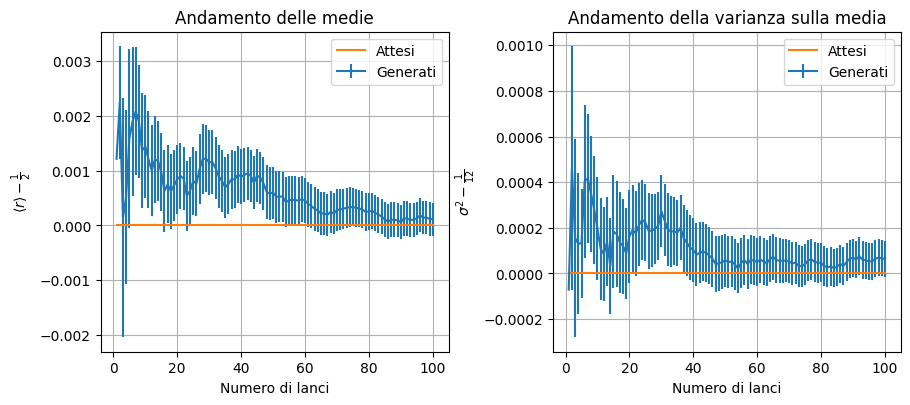

In [40]:
data=[]
#Carico i dati generati
data.append(np.loadtxt("output_ave.dat"))
data.append(np.loadtxt("output_var.dat"))

#List di titoli
titles=[r"Andamento delle medie",r"Andamento della varianza sulla media"]
labels=[r"$\langle r \rangle-\frac{1}{2}$",r"$\sigma^2-\frac{1}{12}$"]
#Faccio più plots
fig,axx=plt.subplots(1, 2, figsize=(10, 4))

for i in range(2):
    axx[i].errorbar(data[i][:,0],data[i][:,2],yerr=data[i][:,3],label="Generati")
    axx[i].plot(data[i][:,0],np.zeros(np.shape(data[i])[0]),label="Attesi")
    axx[i].set_xlabel(r"Numero di lanci")
    axx[i].set_ylabel(labels[i])
    axx[i].set_title(titles[i])
    axx[i].grid(True)
    axx[i].legend()

plt.subplots_adjust(hspace=0.3, wspace=0.3, top=0.9, bottom=0.1, left=0.1, right=0.9)
plt.show()

### Distribuzione dei Numeri Generati

In [41]:
#Funzione che descrive la distribuzione uniforme attesa
def unif_dist():
    x=np.linspace(-0.5,1.5,1000)
    y=np.zeros(np.shape(x))
    for i in range(np.shape(x)[0]):
        if x[i]>=0 and x[i]<=1:
            y[i]=1
    return x,y

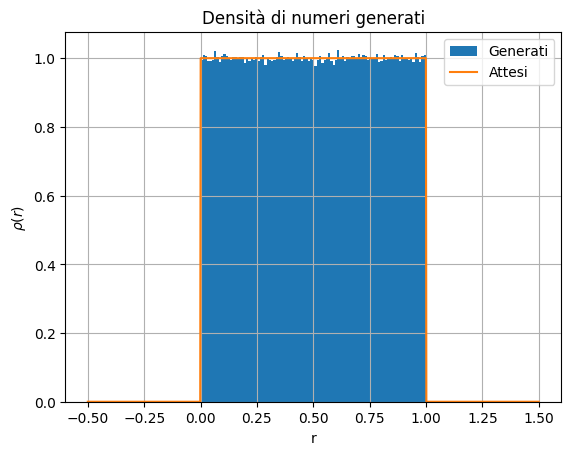

In [44]:
#Carico i dati da file
unif=np.loadtxt("output_numb.dat")
#Genero i dati attesi
x,y=unif_dist()

#Creo un istogramma dei numeri generati
plt.hist(unif,np.linspace(0,1,num=100),density=True,label="Generati")
plt.plot(x,y,label="Attesi")
#Parte estetica
plt.xlabel("r")
plt.ylabel(r"$\rho(r)$")
plt.title("Densità di numeri generati")
plt.legend()
plt.grid(True)

plt.show()

### Distribuzione dei $\chi^2$

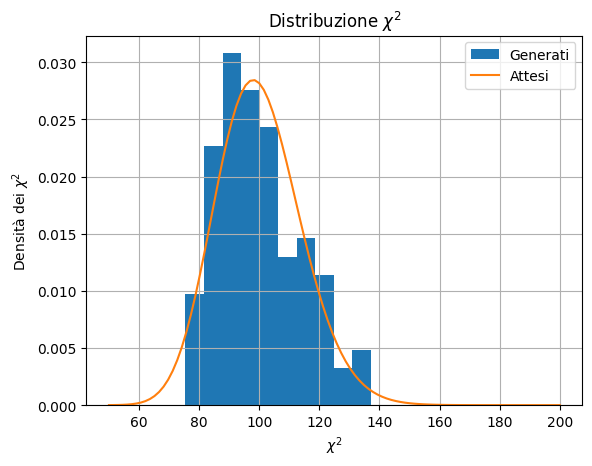

In [43]:
#Carico i dati da file
chi2_data=np.loadtxt("output_chi2.dat")
#Imposto le ascisse per la distribuzione attesa
x=np.linspace(50,200,100)

#Creo un istogramma con la distribuzione dei chi2
plt.hist(chi2_data,10,density=True,label="Generati")
plt.plot(x,chi2.pdf(x,100),label="Attesi")
#Parte estetica
plt.xlabel(r"$\chi^2$")
plt.ylabel(r"Densità dei $\chi^2$")
plt.title(r"Distribuzione $\chi^2$")
plt.legend()
plt.grid(True)


plt.show()

## Teorema del Limite Centrale

In [8]:
#Dati
N=np.array([1,2,10,100]) #Numeri per blocco
bins=100                 #Numeri di intervalli

#Ascisse per i vaolri attesi
x=np.linspace(1,6,bins)

#Valori della Gaussiana
ave=5/2+1               #Vaolre medio
rms=(6**3-1)/15
rms-=ave*ave
rms=np.sqrt(rms/N[-1])  #Deviazione standard

#Creo istogrammi del dado standard
for n in N:
    #Carico i dati generati
    r_std=np.loadtxt("std_"+str(n)+".dat")
    h=plt.hist(r_std,bins,density=True,label="N = "+str(n),histtype='step')

plt.plot(x,norm.pdf(x,ave,rms),label="Gaussiana")
#Parte estetica
plt.xlabel(r"$S_N$")
plt.ylabel(r"$\rho(S_N)$")
plt.title(f"Distribuzione di $S_N$\nDado standard")
plt.legend()
plt.grid(True)

plt.show()

FileNotFoundError: std_1.dat not found.

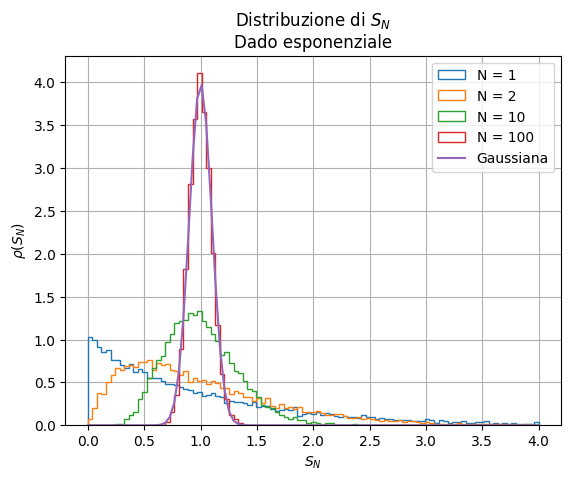

In [12]:
#Ascisse dei valori attesi
x=np.linspace(0,4,bins)

#Valori della Gaussiana
ave=1                 #Valore medio
rms=1/np.sqrt(N[-1])  #Deviazione standard

#Creo istogrammi del dado esponenziale
for n in N:
    #Carico i dati generati
    r_exp=np.loadtxt("exp_"+str(n)+".dat")
    plt.hist(r_exp,np.linspace(0,4,bins),density=True,label="N = "+str(n),histtype='step')
    
plt.plot(x,norm.pdf(x,ave,rms),label="Gaussiana")
#Parte estetica
plt.xlabel(r"$S_N$")
plt.ylabel(r"$\rho(S_N)$")
plt.title(f"Distribuzione di $S_N$\nDado esponenziale")
plt.legend()
plt.grid(True)

plt.show()

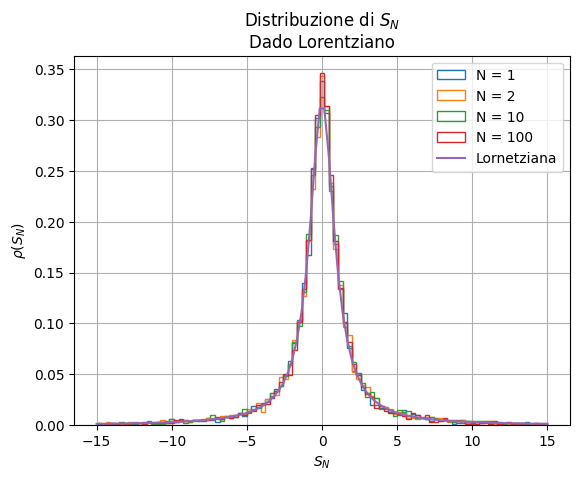

In [9]:
#Ascisse dei valori attesi
x=np.linspace(-15,15,bins)

#Valori della Lorentziana
ave=0      #Valore medio
Gamma=1    #Deviazione standard

#Creo istogrammi del dado esponenziale
for n in N:
    #Carico i dati generati
    r_ltz=np.loadtxt("ltz_"+str(n)+".dat")
    plt.hist(r_ltz,np.linspace(-15,15,bins),density=True,label="N = "+str(n),histtype='step')
    
plt.plot(x,cauchy.pdf(x,ave,Gamma),label="Lornetziana")
#Parte estetica
plt.xlabel(r"$S_N$")
plt.ylabel(r"$\rho(S_N)$")
plt.title(f"Distribuzione di $S_N$\nDado Lorentziano")
plt.legend()
plt.grid(True)

plt.show()

## Esperimento di Buffon

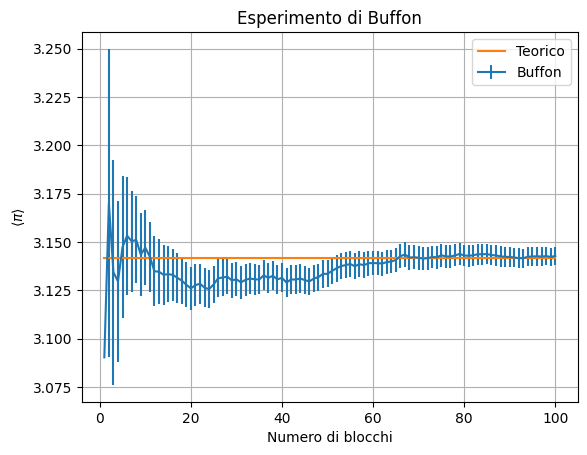

In [3]:
#Carica dati generati
buffon=np.loadtxt("buffon.dat")
#Dati attesi
y=np.ones(np.shape(buffon)[0],dtype=float)*np.pi

#Creo grafico con errore
plt.errorbar(buffon[:,0],buffon[:,1],yerr=buffon[:,2],label="Buffon")
plt.plot(buffon[:,0],y,label="Teorico")
#Parte estetica
plt.xlabel(r"Numero di blocchi")
plt.ylabel(r"$\langle\pi\rangle$")
plt.title(f"Esperimento di Buffon")
plt.legend()
plt.grid(True)

plt.show()